In [1]:
import sys
print(sys.version)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


In [2]:
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import seaborn as sns
import matplotlib.pyplot as plt

import json
from pprint import pprint

# Read File
with open('train.json',encoding='utf-8') as file:
    data = json.load(file)

print("number of all instances:", len(data))

number of all instances: 39774


In [3]:
# Display the data of one instance
pprint(data[0])

{'cuisine': 'greek',
 'id': 10259,
 'ingredients': ['romaine lettuce',
                 'black olives',
                 'grape tomatoes',
                 'garlic',
                 'pepper',
                 'purple onion',
                 'seasoning',
                 'garbanzo beans',
                 'feta cheese crumbles']}


In [4]:
# Data preprocessing
# Get all ingredients of all cuisines
all_cuisine_ingredients = []
print(datetime.now(),' preprocessing start ...')
print(datetime.now(),' start to get all ingredients ...')
for i in range(len(data)):
    cuisine_ingredients = data[i]['ingredients']
    for ingredient in cuisine_ingredients:
        if ingredient not in all_cuisine_ingredients:
            all_cuisine_ingredients.append(ingredient)
print(datetime.now(),' finish getting all ingredients.')
            
instances = []

column_names = all_cuisine_ingredients.copy()
column_names.insert(0, 'id')
column_names.insert(1, 'category')

print(datetime.now(),' start to convert data ...')
for i in range(len(data)):
    cuisine_id = data[i]['id']
    cuisine_name = data[i]['cuisine']
    cuisine_ingredients = data[i]['ingredients']
    instance = []
    instance.append(cuisine_id)
    instance.append(cuisine_name)
    for ingredient in all_cuisine_ingredients:
        if ingredient in cuisine_ingredients:
            instance.append(1)
        else:
            instance.append(0)
    instances.append(instance)
    
print(datetime.now(),' finish converting data.')
print(datetime.now(),' finish preprocessing.')

processed_data = pd.DataFrame(instances, columns=column_names)

2019-01-16 03:46:53.218792  preprocessing start ...
2019-01-16 03:46:53.218792  start to get all ingredients ...
2019-01-16 03:46:58.970315  finish getting all ingredients.
2019-01-16 03:46:58.970315  start to convert data ...
2019-01-16 03:48:19.381598  finish converting data.
2019-01-16 03:48:19.381598  finish preprocessing.


In [5]:
# Extract X and Y
X = processed_data.drop(['id', 'category'], axis=1, inplace=False)
Y = processed_data.get(['category'])

# Data Split
X_non_test, X_test, Y_non_test, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_non_test, Y_non_test, test_size=1/9, random_state=42)

print('number of training instances:',len(X_train))
print('number of validation instances:',len(X_validation))
print('number of testing instances:',len(X_test))



number of training instances: 31818
number of validation instances: 3978
number of testing instances: 3978


In [6]:
# Data Exploratory
non_test_data = Y_non_test.join(X_non_test, lsuffix='_Y_non_test', rsuffix='_X_non_test')
display(non_test_data.head(n=10))

,category,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
28889,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20857,chinese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21907,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28667,mexican,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25618,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2730,mexican,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29572,southern_us,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
377,french,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23575,mexican,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2442,indian,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Data Exploratory
display(X_non_test.describe())

,romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles,plain flour,...,Oscar Mayer Cotto Salami,Challenge Butter,orange glaze,cholesterol free egg substitute,ciabatta loaf,Lipton® Iced Tea Brew Family Size Tea Bags,Hidden Valley® Greek Yogurt Original Ranch® Dip Mix,lop chong,tomato garlic pasta sauce,crushed cheese crackers
count,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,...,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000,35796.000000
mean,0.006509,0.005587,0.005755,0.185943,0.111549,0.047296,0.003548,0.003632,0.008940,0.003632,...,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028,0.000028
std,0.080417,0.074540,0.075643,0.389066,0.314815,0.212274,0.059459,0.060155,0.094127,0.060155,...,0.005285,0.005285,0.005285,0.005285,0.005285,0.005285,0.005285,0.005285,0.005285,0.005285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


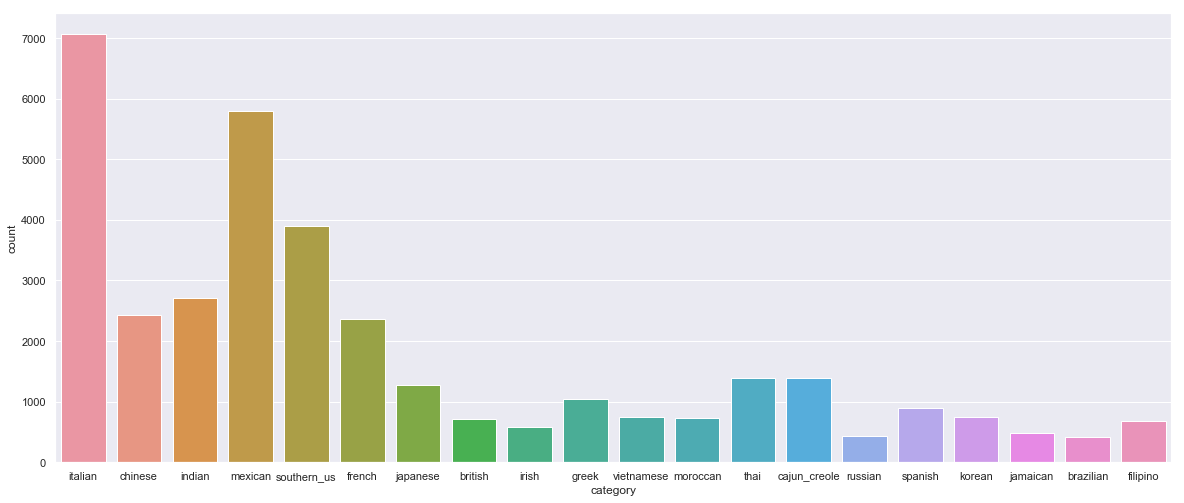

In [8]:
# Data Exploratory
sns.set(rc={'figure.figsize':(20,8.27)})
sns.countplot(x="category", data=Y_non_test)

In [9]:
def fit_model(X, y, classifier, params):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree trained on the input data [X, y]. """

    rs = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    cv_sets = rs.get_n_splits(X)

    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=classifier, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y.values.ravel())
    print("best parameters from grid search:", grid.best_params_)
    # Return the optimal model after fitting the data
    return grid.best_estimator_


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    return score


def get_performance(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """
    accuracy = accuracy_score(y_true, y_predict)
    f1 = f1_score(y_true, y_predict, average='macro')
    precision = precision_score(y_true, y_predict, average='macro')
    recall = recall_score(y_true, y_predict, average='macro')
   
    performance = {}
    performance["accuracy"] = round(accuracy, 4)
    performance["f1_score"] = round(f1, 4)
    performance["precision"] = round(precision, 4)
    performance["recall"] = round(recall, 4)
    return performance

In [10]:
# Store all performance result
results = []


# Benchmark model: Simple Decision Tree
decision_tree_clf = DecisionTreeClassifier(random_state=0)

# Training
print("Decision Tree starts to train ...")
t0 = datetime.now()
decision_tree_clf.fit(X_train, Y_train.values.ravel())
elapsed_time = datetime.now() - t0
print("Decision Tree finished training, training time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Validation
print("Decision Tree starts to train ...")
t0 = datetime.now()
Y_prediction = decision_tree_clf.predict(X_validation)
elapsed_time = datetime.now() - t0
print("Decision Tree finished validation, validation time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Calculate Validation Performance
performance = get_performance(Y_validation, Y_prediction)
print("Decision Tree validation performance:", performance)

# Aggregate Validation Performance
result = performance
result['model'] = 'Decision Tree'
result['parameters'] = str(decision_tree_clf.get_params())
result['phase'] = 'validation'
results.append(result)
print("Decision Tree parameters:", result['parameters'])

Decision Tree starts to train ...
Decision Tree finished training, training time: 33.494376 s
Decision Tree starts to train ...
Decision Tree finished validation, validation time: 0.21439 s
Decision Tree validation performance: {'accuracy': 0.6006, 'f1_score': 0.4806, 'precision': 0.5015, 'recall': 0.4685}
Decision Tree parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}


In [11]:
# Model: Random Forest
rf_clf = RandomForestClassifier(random_state=0, n_estimators=10)

# Training
print("Random Forest starts to train ...")
t0 = datetime.now()
rf_clf.fit(X_train, Y_train.values.ravel())
elapsed_time = datetime.now() - t0
print("Random Forest finished training, training time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Validation
print("Random Forest starts to validate ...")
t0 = datetime.now()
Y_prediction = rf_clf.predict(X_validation)
elapsed_time = datetime.now() - t0
print("Random Forest finished validation, validation time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Calculate Validation Performance
performance = get_performance(Y_validation, Y_prediction)
print("Random Forest validation performance:", performance)

# Aggregate Validation Performance
result = performance
result['model'] = 'Random Forest'
result['parameters'] = str(rf_clf.get_params())
result['phase'] = 'validation'
results.append(result)
print("Random Forest parameters:", result['parameters'])

Random Forest starts to train ...
Random Forest finished training, training time: 10.479946000000002 s
Random Forest starts to validate ...
Random Forest finished validation, validation time: 0.27562 s
Random Forest validation performance: {'accuracy': 0.6626, 'f1_score': 0.5316, 'precision': 0.6154, 'recall': 0.4984}
Random Forest parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [12]:
# Model: Gradient Boosting Decision Trees
gb_clf = GradientBoostingClassifier(random_state=0, n_estimators=10)

# Training
print("Gradient Boosting Decision Trees starts to train ...")
t0 = datetime.now()
gb_clf.fit(X_train, Y_train.values.ravel())
elapsed_time = datetime.now() - t0
print("Gradient Boosting Decision Trees finished training, training time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Validation
print("Gradient Boosting Decision Trees starts to validate ...")
t0 = datetime.now()
Y_prediction = gb_clf.predict(X_validation)
elapsed_time = datetime.now() - t0
print("Gradient Boosting Decision Trees finished validation, validation time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Calculate Validation Performance
performance = get_performance(Y_validation, Y_prediction)
print("Gradient Boosting Decision Trees validation performance:", performance)

# Aggregate Validation Performance
result = performance
result['model'] = 'Gradient Boosting Decision Trees'
result['parameters'] = str(gb_clf.get_params())
result['phase'] = 'validation'
results.append(result)
print("Gradient Boosting Decision Trees parameters:", result['parameters'])

Gradient Boosting Decision Trees starts to train ...
Gradient Boosting Decision Trees finished training, training time: 431.69626800000003 s
Gradient Boosting Decision Trees starts to validate ...
Gradient Boosting Decision Trees finished validation, validation time: 0.703878 s
Gradient Boosting Decision Trees validation performance: {'accuracy': 0.5835, 'f1_score': 0.4837, 'precision': 0.7057, 'recall': 0.4179}
Gradient Boosting Decision Trees parameters: {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [13]:
# Model Tuning
# Choose random forest to do grid search
rf_clf = RandomForestClassifier(random_state=0)

# Create a dictionary for grid search parameters
params = {'n_estimators': [10, 20, 30, 40, 50],'criterion': ['gini','entropy']}

# Grid Search
print("Random Forest starts to grid search ...")
t0 = datetime.now()
grid_searched_rf_clf = fit_model(X_train, Y_train, rf_clf, params)
elapsed_time = datetime.now() - t0
print("Random Forest finished grid search, grid search time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')
print("Grid Searched Random Forest parameters:", grid_searched_rf_clf.get_params())


Random Forest starts to grid search ...
best parameters from grid search: {'criterion': 'gini', 'n_estimators': 50}
Random Forest finished grid search, grid search time: 1741.929126 s
Grid Searched Random Forest parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [14]:
# In order to get pure training time, use best parameters from grid search to train again.
refined_rf_clf = RandomForestClassifier(random_state=0, n_estimators = 50, criterion='gini')

# Training
print("Random Forest by best parameter setting from grid search starts to train ...")
t0 = datetime.now()
refined_rf_clf.fit(X_train, Y_train.values.ravel())
elapsed_time = datetime.now() - t0
print("Random Forest finished training, training time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Validation
print("grid searched Random Forest starts to validate ...")
t0 = datetime.now()
Y_prediction = refined_rf_clf.predict(X_validation)
elapsed_time = datetime.now() - t0
print("grid searched Random Forest finished validation, validation time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Get Validation Performance
performance = get_performance(Y_validation, Y_prediction)
print("grid searched Random Forest validation performance:", performance)

# Aggregate Validation Performance
result = performance
result['model'] = 'Grid Searched Random Forest'
result['parameters'] = str(refined_rf_clf.get_params())
result['phase'] = 'validation'
results.append(result)
print("Grid Searched Random Forest parameters:", result['parameters'])



# Testing: Choose grid searched random forest as the final model to do Testing
t0 = datetime.now()
Y_prediction = refined_rf_clf.predict(X_test)
elapsed_time = datetime.now() - t0
print("grid searched random forest testing time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Get Testing Performance
performance = get_performance(Y_test, Y_prediction)
print("grid searched random forest testing performance:", performance)

# Aggregate Testing Performance
result = performance
result['model'] = 'Grid Searched Random Forest'
result['parameters'] = str(refined_rf_clf.get_params())
result['phase'] = 'testing'
results.append(result)
print("Grid Searched Random Forest parameters:", result['parameters'])

Random Forest by best parameter setting from grid search starts to train ...
Random Forest finished training, training time: 49.50501800000001 s
grid searched Random Forest starts to validate ...
grid searched Random Forest finished validation, validation time: 0.673622 s
grid searched Random Forest validation performance: {'accuracy': 0.7029, 'f1_score': 0.5882, 'precision': 0.7274, 'recall': 0.5358}
Grid Searched Random Forest parameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
grid searched random forest testing time: 0.70305 s
grid searched random forest testing performance: {'accuracy': 0.7159, 'f1_score': 0.601, 'precision': 0.7413, 'recall': 0.545

In [15]:
# Testing: benchmark model
print("Decision Tree starts to train ...")
t0 = datetime.now()
Y_prediction = decision_tree_clf.predict(X_test)
elapsed_time = datetime.now() - t0
print("Decision Tree finished testing, testing time:", (elapsed_time.total_seconds() + elapsed_time.microseconds/1000000),'s')

# Calculate Testing Performance
performance = get_performance(Y_test, Y_prediction)
print("Decision Tree testing performance:", performance)

# Aggregate Testing Performance
result = performance
result['model'] = 'Decision Tree'
result['parameters'] = str(decision_tree_clf.get_params())
result['phase'] = 'testing'
results.append(result)
print("Decision Tree parameters:", result['parameters'])

Decision Tree starts to train ...
Decision Tree finished testing, testing time: 0.17189 s
Decision Tree testing performance: {'accuracy': 0.6083, 'f1_score': 0.5006, 'precision': 0.527, 'recall': 0.484}
Decision Tree parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}


In [16]:
# Display result
result_table = pd.DataFrame(results)
display(result_table)

,accuracy,f1_score,model,parameters,phase,precision,recall
0,0.6006,0.4806,Decision Tree,"{'class_weight': None, 'criterion': 'gini', 'm...",validation,0.5015,0.4685
1,0.6626,0.5316,Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",validation,0.6154,0.4984
2,0.5835,0.4837,Gradient Boosting Decision Trees,"{'criterion': 'friedman_mse', 'init': None, 'l...",validation,0.7057,0.4179
3,0.7029,0.5882,Grid Searched Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",validation,0.7274,0.5358
4,0.7159,0.6010,Grid Searched Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",testing,0.7413,0.5458
5,0.6083,0.5006,Decision Tree,"{'class_weight': None, 'criterion': 'gini', 'm...",testing,0.5270,0.4840


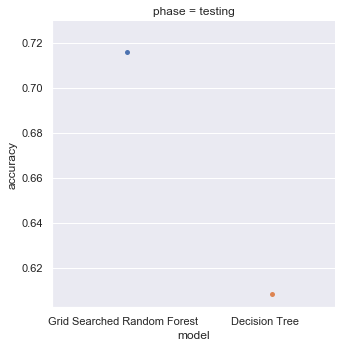

In [17]:
sns.catplot(x="model", col="phase", data=result_table[result_table['phase']=='testing'], y="accuracy")